# Business Problem
In this competitive business environment, Insurance companies are adopting aggressive marketing strategies for new customer acquisition and existing customer retention. To adapt to the changing market landscape, an organization must monitor changes in buying patterns and behavior of the customers based on various demographics, geographies & psychographics profile. The analysis of existing customer’s data can through many insights of the customer such as their buying behavior, buying Pattern, brand loyalty, investment pattern & customer churn. Such insight can be of great help to Marketing Head while devising new Marketing strategy.

While embracing digital is integral to competing in the market, consumers still heavily rely on the human, one-on-one service that only agents are able to provide. Great customer service is foundational for all agents. Providing the ideal mix of technology solutions and personal interaction should be at the center of an agency’s planning process as it prepares to meet customer demands and increase growth and retention.

NationWide Bank in the United States, Besides usual services, this bank also provides car insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options.

AtNationWide (https://www.nationwide.com/) the mission is to help people and businesses prosper. NationWide is always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals. Their data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge.

Can we help the Marketing head with some kind of technology solutions which can enable planning process as it prepares to meet customer demands and increase growth and retention?

We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).

You have data about 4000 customers who were contacted during the last campaign and for whom the results of campaign (did the customer buy insurance or not) are known. Let us build machine learning model to help NationWide.

# Task and Approach:

The task is to predict for 1000 customers who were contacted during the current campaign, whether they will buy car insurance or not.We will be using logistic Regression to predict it
 

## Step 1 : Importing LIbraries and Understanding Data

Numpy, pandas , seaborn and matplotlib.pyplot are imported with aliases np, pd, sns and plt respectively

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading train and test dataset
df_train = pd.read_csv('carInsurance_train.csv')
df_test = pd.read_csv('carInsurance_test.csv')

In [3]:
#Dimensions of the datasets
df_train.shape, df_test.shape

((4000, 19), (1000, 19))

In [4]:
#First 10 rows of the train dataset
df_train.head(10)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


#### Data Type

In [5]:
#Let's check the datatype of all columns
df_train.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [6]:
#Let's remove some unnecessary column from train and test dataset
df_train.drop(['Id', 'CallStart', 'CallEnd'], axis=1, inplace=True)
df_test.drop(['Id', 'CallStart', 'CallEnd'], axis=1, inplace=True)

### Summary of the dataset

In [7]:
#Let's look at some statistical information of all continuous variables of train data
df_train.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
#Let's look at statistical information of all categorical variables of train data
df_train.describe(include=np.object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome
count,3981,4000,3831,3098,4000,958
unique,11,3,3,2,12,3
top,management,married,secondary,cellular,may,failure
freq,893,2304,1988,2831,1049,437


## Step 2: Visualizing Data

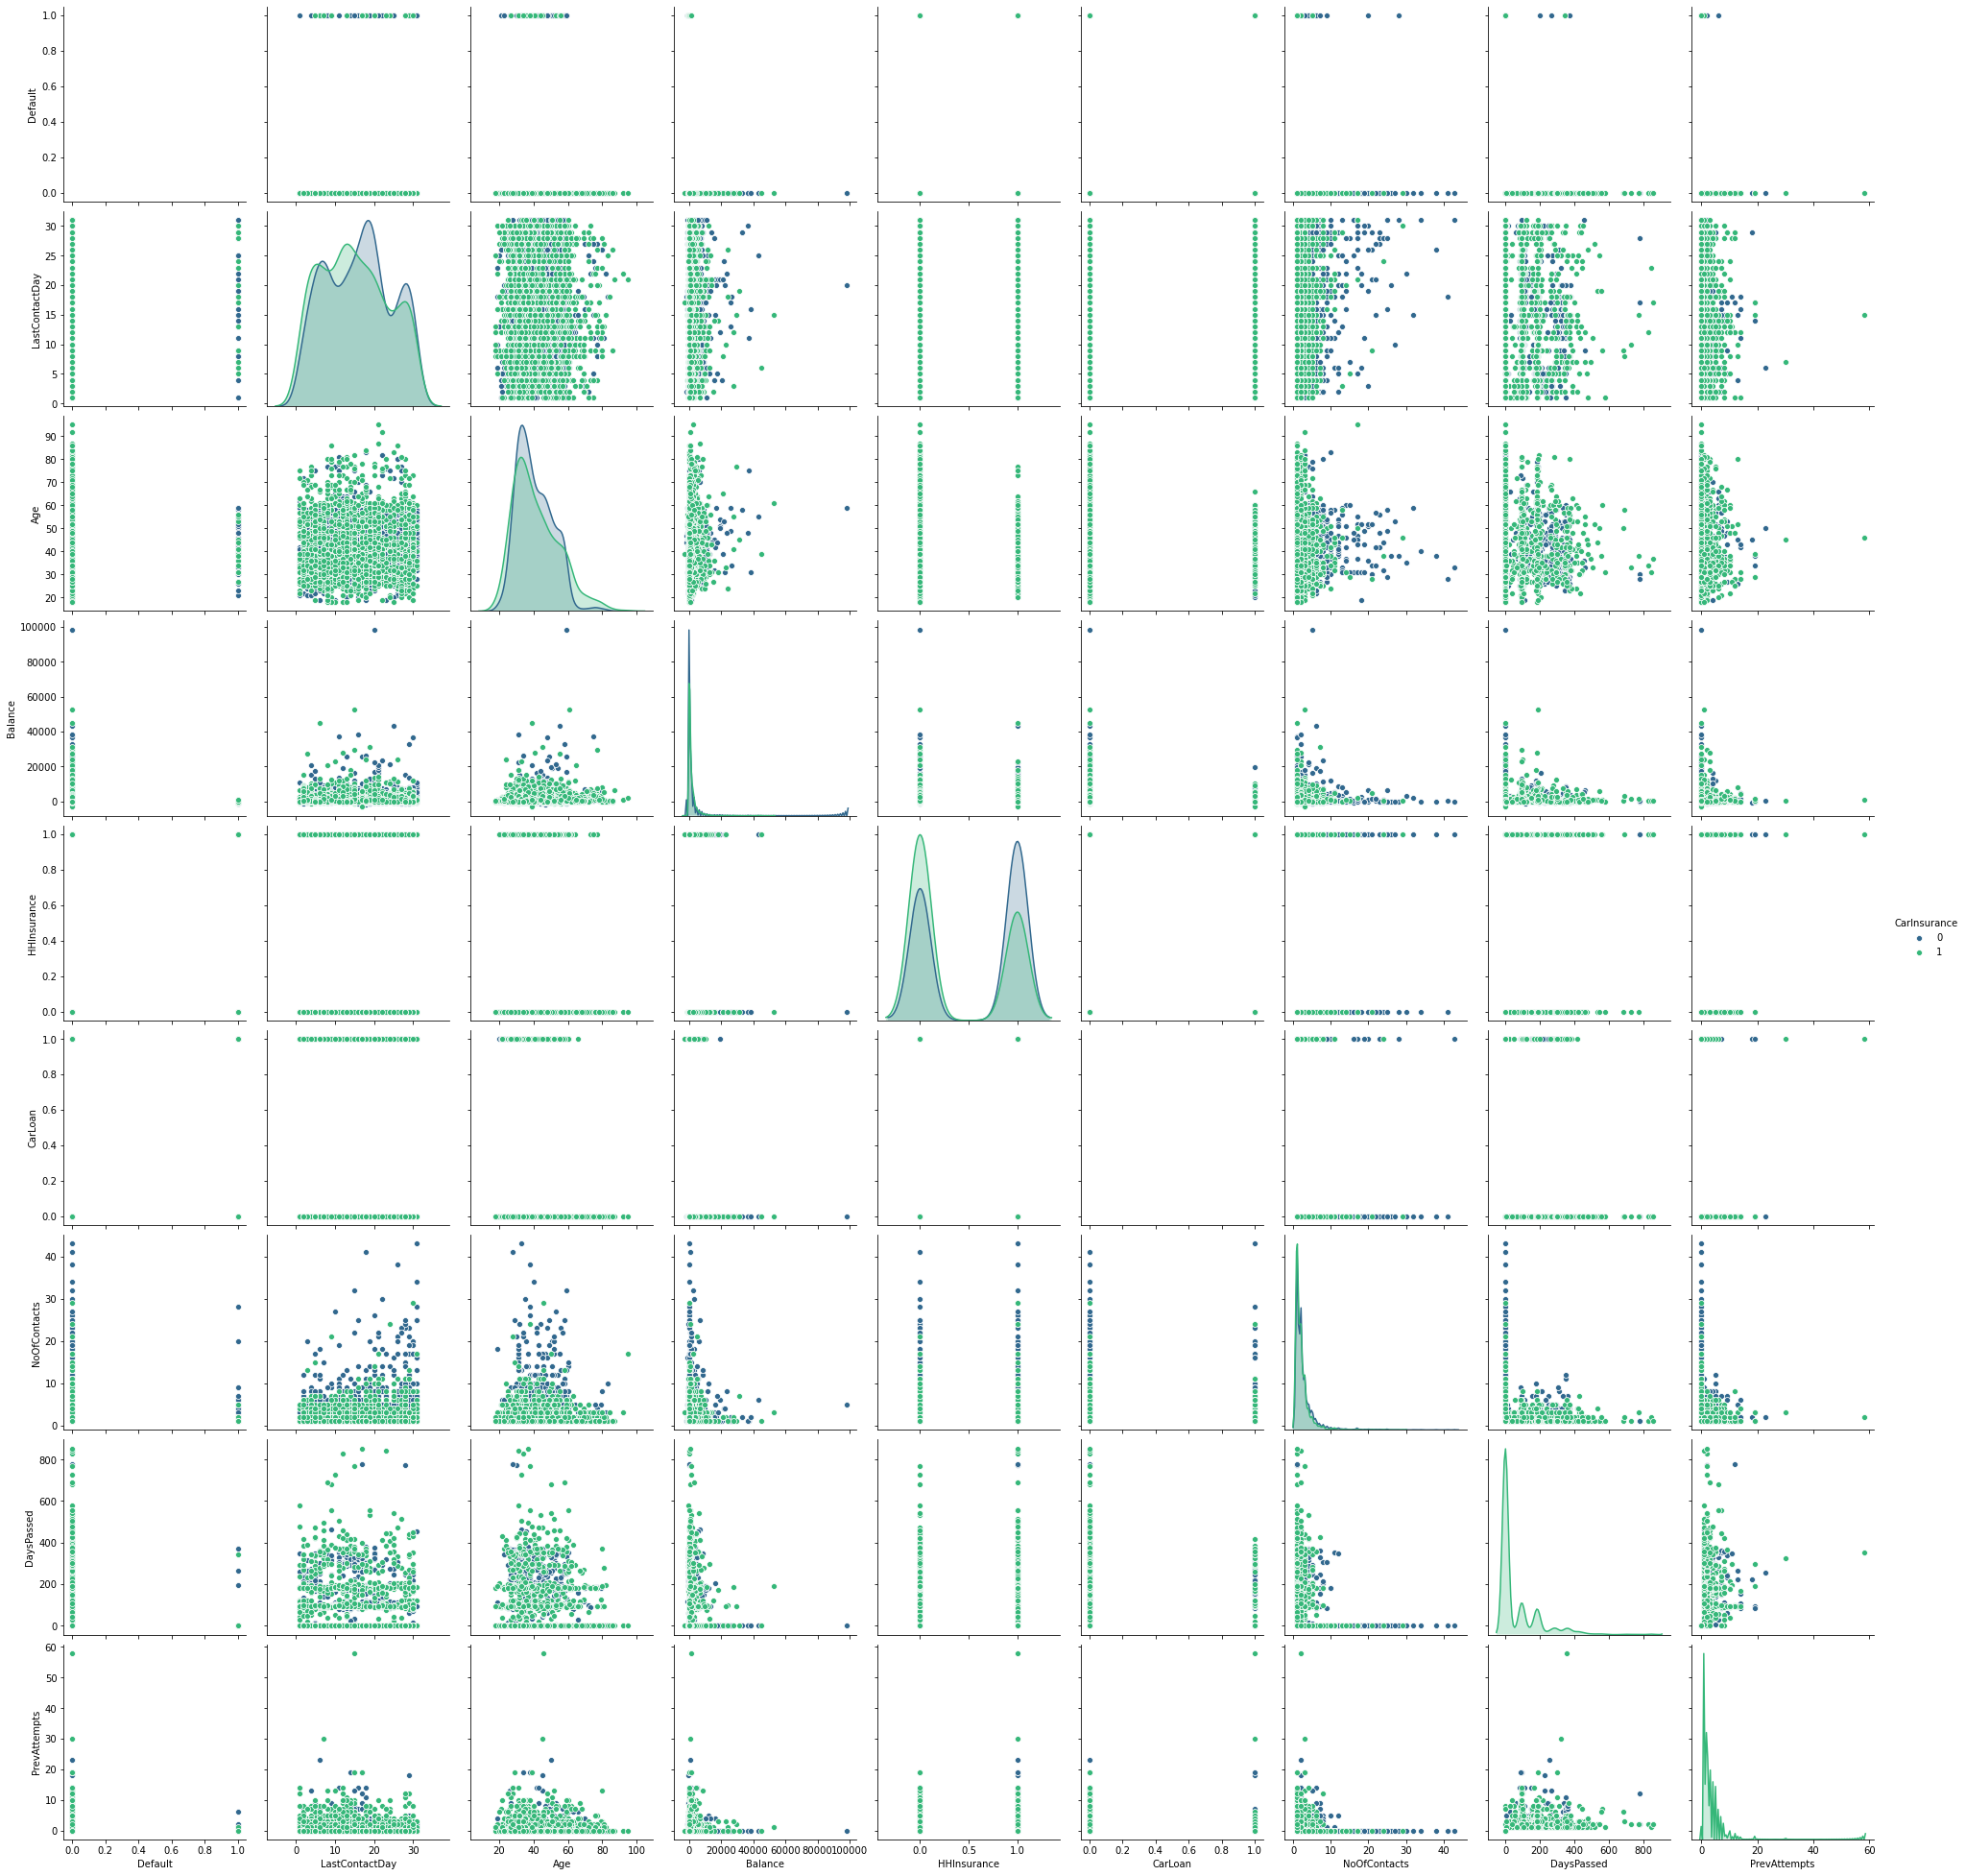

In [9]:
# Visualise the relationship between the features and the response using scatterplots
#Plot pair plot for some important features
imp_features = ['CarInsurance', 'Default', 'LastContactDay', 'Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(df_train[imp_features], hue='CarInsurance', palette='viridis', size=3.0)
plt.show()

Age: It's interesting to see that seniors are more likely to buy car insurance.

Balance: For balance, the data point at the upper right corner might be an outlier

HHInsurance: Households insured are less likely to buy car insurance

CarLoan: People with car loan are less likely to buy

NoOfContacts: Too many contacts causes customer attrition

DaysPassed: It looks like the more day passed since the last contact, the better

PrevAttempts: Also, more previous attempts, less likely to buy. There is a potential outlier here

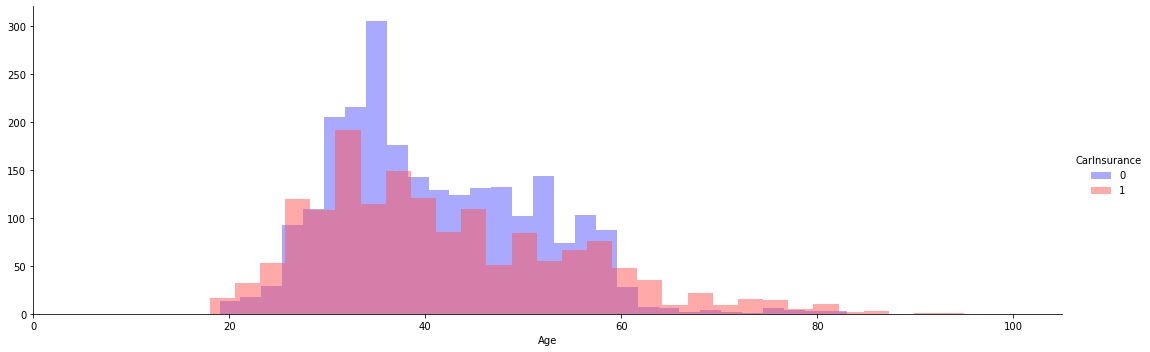

In [10]:
#Take a further look at age
facet = sns.FacetGrid(df_train, hue='CarInsurance', size=5, aspect=3, palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5)
facet.set(xlim=(0, df_train.Age.max() + 10))
facet.add_legend()

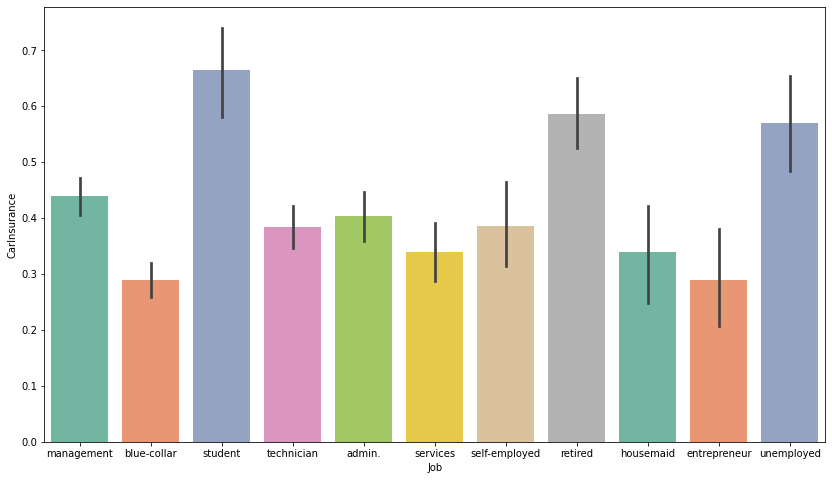

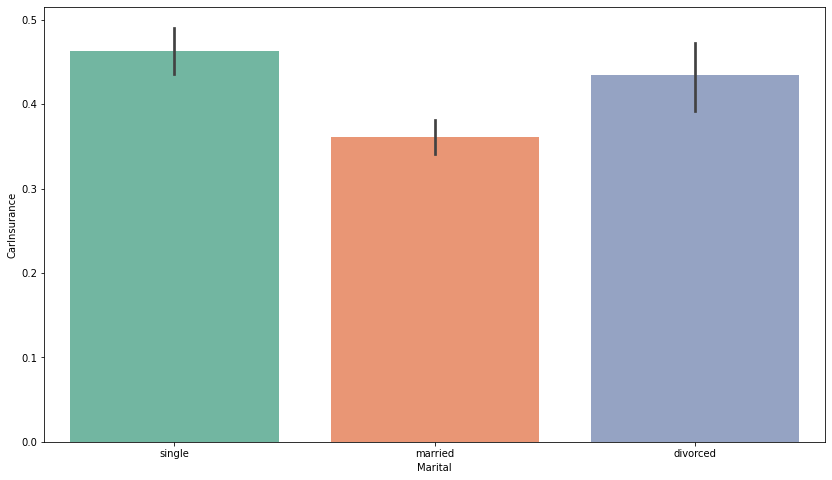

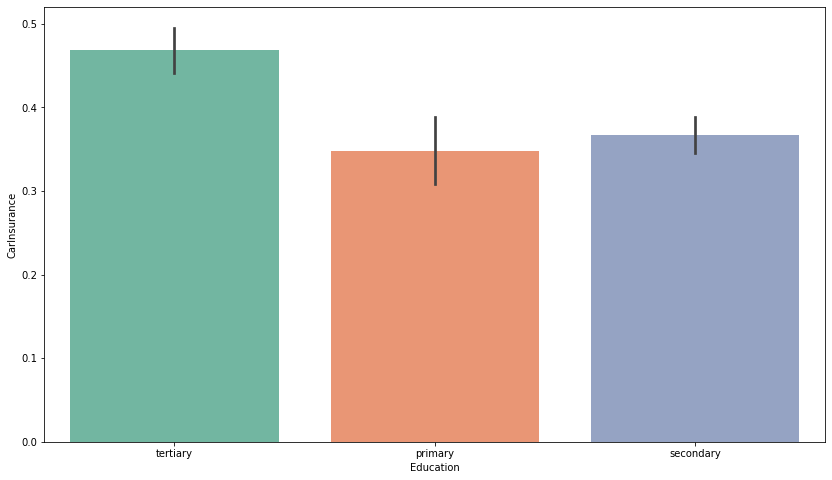

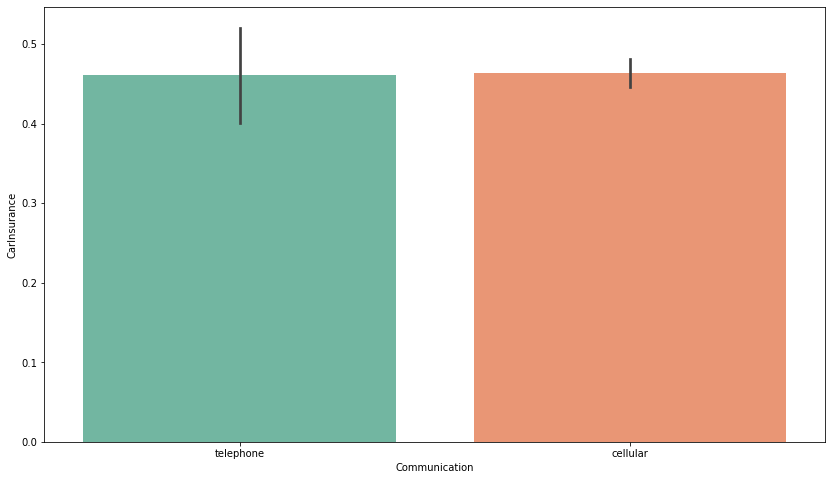

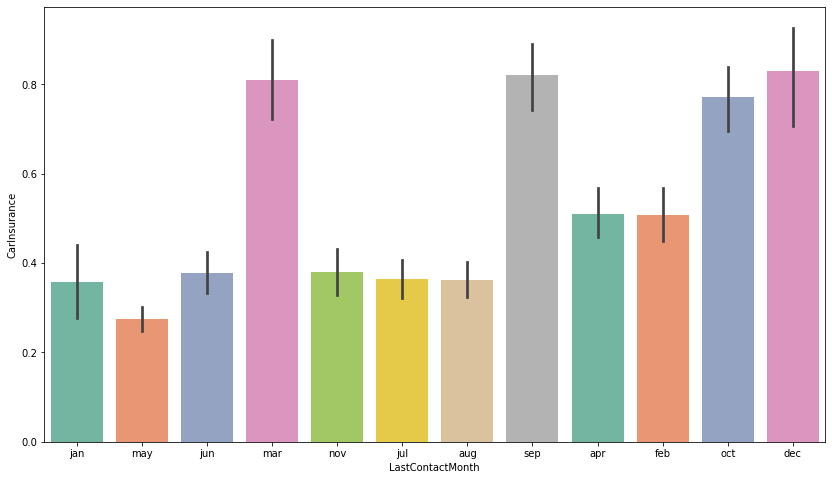

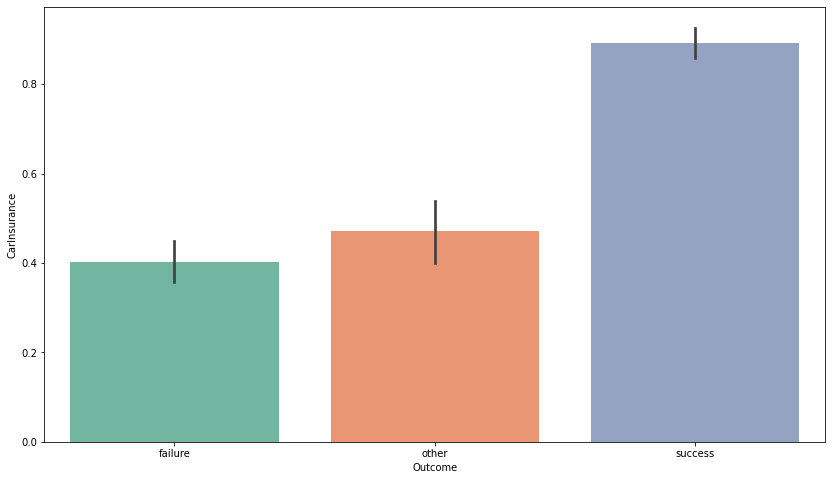

In [11]:
#Let's check out categorical features
categorical = df_train.select_dtypes(include=['object']).columns
# This loop will help us to print all the graphs in one go..
for features in categorical:
    plt.figure(figsize=(14, 8))
    sns.barplot(features, 'CarInsurance', data=df_train, palette='Set2')

Job: Student are most likely to buy insurance, followed by retired and unemployed folks

Marital status: Married people are least likely to buy car insurance. Opportunities for developing family insurance business

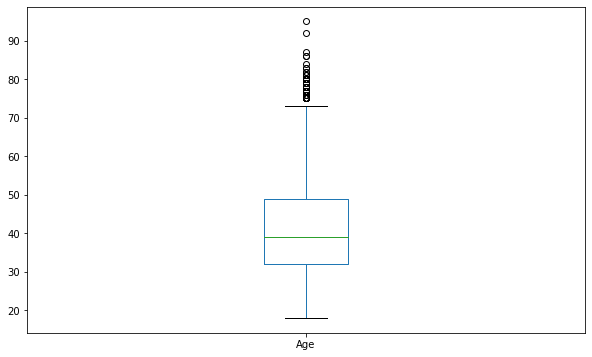

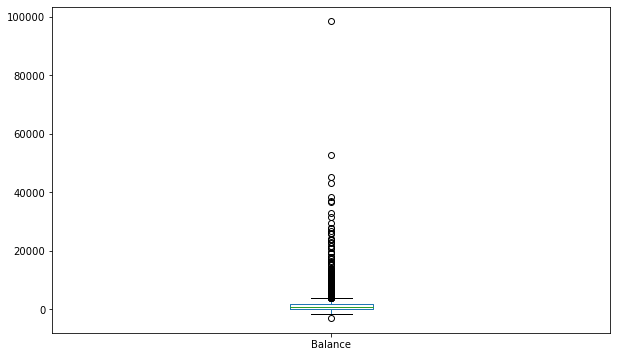

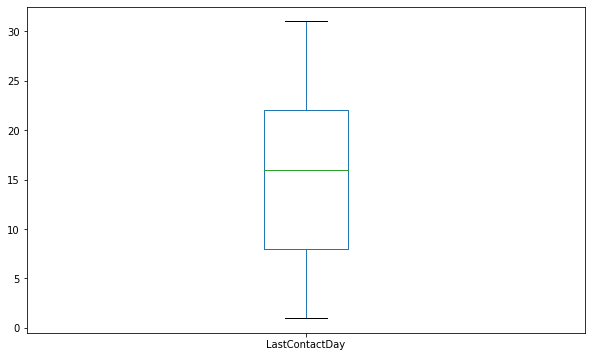

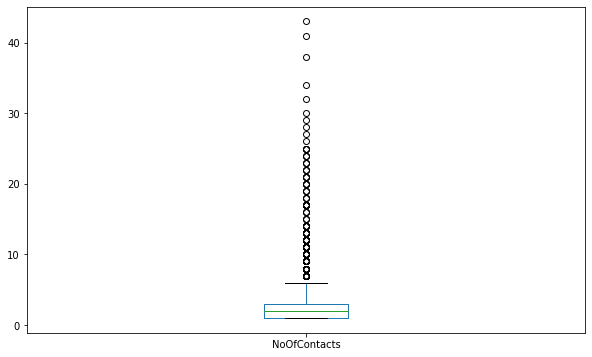

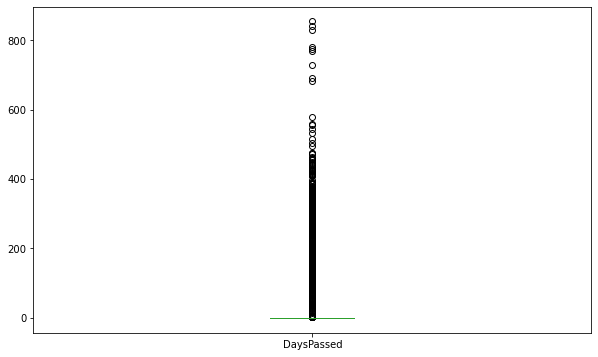

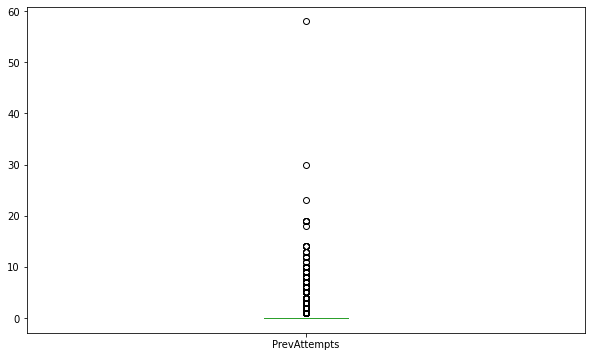

In [12]:
#Plot the boxplot to check for the outliers
numerical_features = ['Age', 'Balance', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
for features in numerical_features:
    plt.figure(figsize=(10, 6))
    df_train[features].plot.box()

### Handling Missing values

In [13]:
#Merge train and test data here in order to impute missing values all at once
merge_df = pd.concat([df_train, df_test], keys=('train', 'test'))
merge_df.shape

(5000, 16)

In [14]:
#Removing CarInsurane variable
merge_df.drop('CarInsurance', axis=1, inplace=True)

In [15]:
# Now let us check how many missing values are there in the columns and their percentage
#Total missing values in every column
total_missing = merge_df.isnull().sum()

#Calculate percentage of missing values in every column
percentage = total_missing/merge_df.isnull().count()

#Combine total and percentage values
null_df = pd.concat([total_missing, percentage], axis=1, keys=['total', 'percentage'])

#Select only those column which have missing values
null_df[null_df.total > 0].sort_values(by='total', ascending=False)

,total,percentage
Outcome,3799,0.7598
Communication,1123,0.2246
Education,216,0.0432
Job,24,0.0048


In [16]:
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
dtype: int64

### Replacing Missing Values

In [17]:
#before we do anything let us make a copy of the data. Why we are doing it?

# If we made some error it will not be on the original data 
#and we have a backup else we have to rerun above analysis
copy_df = merge_df.copy()

In [18]:
#Check for a missing values in Outcome variable
merge_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [19]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.
merge_df.loc[merge_df['DaysPassed'] == -1, 'Outcome'] = 'NoPrev'

In [20]:
merge_df.groupby('Outcome')['Age'].count()

Outcome
NoPrev     3799
failure     548
other       248
success     405
Name: Age, dtype: int64

In [21]:
merge_df['Communication'].value_counts()

cellular     3529
telephone     348
Name: Communication, dtype: int64

In [22]:
#Fill missing values with None
merge_df['Communication'].fillna('None', inplace=True)
merge_df['Communication'].value_counts()

cellular     3529
None         1123
telephone     348
Name: Communication, dtype: int64

Let us try to do the mapping of Education to the job. Yes jobs are related to the education

In [23]:
merge_df['Education'].value_counts()

secondary    2489
tertiary     1601
primary       694
Name: Education, dtype: int64

In [24]:
# Fill missing education with the most common education level by job type
#Create Job-Education level mode mapping
edu_mode = []

#Different Job Types
job_types = merge_df.Job.value_counts().index
print(job_types)

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')


In [25]:
#Which job is the most
merge_df['Job'].value_counts()

management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [26]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.

# It means when there are many people in the managment job then most of them are in which education.

# We can find that in below mapping
for job in job_types:
    mode = merge_df[merge_df.Job == job]['Education'].value_counts().nlargest(1).index  
    edu_mode = np.append(edu_mode, mode)                                   
edu_map = pd.Series(edu_mode, index=merge_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

nlargest(n): It gives n maximum numbers in a list 
nsmallest(n): It gives n minimum numbers in a list

In [27]:
#Apply the mapping to missing eductaion obs. We will replace education now by jobs value
for i in job_types:
    merge_df.loc[(merge_df['Education'].isnull()) & (merge_df['Job'] == i), 'Education'] = edu_map.loc[edu_map.index == i][0]
#For those who are not getting mapped we will create a new category as None
merge_df['Education'].fillna('None', inplace=True)

**We can see that there are 24 values where job is also missing.**

In [28]:
#Missing values in Job variable
merge_df['Job'].isnull().sum()

24

In [29]:
#Fill missing values in Job with None
merge_df['Job'].fillna('None', inplace=True)

In [30]:
merge_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
dtype: int64

**Now let us get numeric and categorical data different as we need to use modeing**

#### Numerical Columns

In [31]:
num_col = merge_df.select_dtypes(include=np.number).columns.tolist()
num_col

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [32]:
#Create dataframe of numerical variable
df_num = merge_df[num_col]
df_num

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32        0     1218            1        0              28   
      1     32        0     1156            1        0              26   
      2     29        0      637            1        0               3   
      3     25        0      373            1        0              11   
      4     30        0     2694            0        0               3   
...        ...      ...      ...          ...      ...             ...   
test  995   31        0      131            1        0              15   
      996   52        0     2635            0        0               6   
      997   46        0     3009            0        0               4   
      998   60        0     7038            0        0               7   
      999   28        0      957            0        0              25   

           NoOfContacts  DaysPassed  PrevAttempts  
train 0               2          -1             0  
      1               5          -1             0  
      2               1         119             1  
      3               2          -1             0  
      4               1          -1             0  
...                 ...         ...           ...  
test  995             1          -1             0  
      996             1         108             8  
      997             2          -1             0  
      998             4          -1             0  
      999             2          -1             0  

[5000 rows x 9 columns]

#### Categorical columns

In [33]:
cat_col = merge_df.select_dtypes(include=['object']).columns.tolist()
cat_col

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [34]:
#Create dataframe of all categorical variable
df_cat = merge_df[cat_col]
df_cat

Job  Marital  Education Communication LastContactMonth  \
train 0     management   single   tertiary     telephone              jan   
      1    blue-collar  married    primary          None              may   
      2     management   single   tertiary      cellular              jun   
      3        student   single    primary      cellular              may   
      4     management  married   tertiary      cellular              jun   
...                ...      ...        ...           ...              ...   
test  995       admin.   single  secondary      cellular              jun   
      996   management  married   tertiary      cellular              sep   
      997   technician  married   tertiary      cellular              aug   
      998      retired  married  secondary     telephone              oct   
      999   management   single   tertiary      cellular              may   

           Outcome  
train 0     NoPrev  
      1     NoPrev  
      2    failure  
      3     NoPrev  
      4     NoPrev  
...            ...  
test  995   NoPrev  
      996  success  
      997   NoPrev  
      998   NoPrev  
      999   NoPrev  

[5000 rows x 6 columns]

#### Dummy columns

In [35]:
#Let's create dummies columns of all categorical variables
df_dummy = pd.get_dummies(df_cat)
df_dummy.head()

Job_None  Job_admin.  Job_blue-collar  Job_entrepreneur  \
train 0         0           0                0                 0   
      1         0           0                1                 0   
      2         0           0                0                 0   
      3         0           0                0                 0   
      4         0           0                0                 0   

         Job_housemaid  Job_management  Job_retired  Job_self-employed  \
train 0              0               1            0                  0   
      1              0               0            0                  0   
      2              0               1            0                  0   
      3              0               0            0                  0   
      4              0               1            0                  0   

         Job_services  Job_student  ...  LastContactMonth_jun  \
train 0             0            0  ...                     0   
      1             0            0  ...                     0   
      2             0            0  ...                     1   
      3             0            1  ...                     0   
      4             0            0  ...                     1   

         LastContactMonth_mar  LastContactMonth_may  LastContactMonth_nov  \
train 0                     0                     0                     0   
      1                     0                     1                     0   
      2                     0                     0                     0   
      3                     0                     1                     0   
      4                     0                     0                     0   

         LastContactMonth_oct  LastContactMonth_sep  Outcome_NoPrev  \
train 0                     0                     0               1   
      1                     0                     0               1   
      2                     0                     0               0   
      3                     0                     0               1   
      4                     0                     0               1   

         Outcome_failure  Outcome_other  Outcome_success  
train 0                0              0                0  
      1                0              0                0  
      2                1              0                0  
      3                0              0                0  
      4                0              0                0  

[5 rows x 38 columns]

#### Combine Numerical and Dummy dataframes

In [36]:
df = pd.concat([df_num, df_dummy], axis=1)
df

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32        0     1218            1        0              28   
      1     32        0     1156            1        0              26   
      2     29        0      637            1        0               3   
      3     25        0      373            1        0              11   
      4     30        0     2694            0        0               3   
...        ...      ...      ...          ...      ...             ...   
test  995   31        0      131            1        0              15   
      996   52        0     2635            0        0               6   
      997   46        0     3009            0        0               4   
      998   60        0     7038            0        0               7   
      999   28        0      957            0        0              25   

           NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0               2          -1             0         0  ...   
      1               5          -1             0         0  ...   
      2               1         119             1         0  ...   
      3               2          -1             0         0  ...   
      4               1          -1             0         0  ...   
...                 ...         ...           ...       ...  ...   
test  995             1          -1             0         0  ...   
      996             1         108             8         0  ...   
      997             2          -1             0         0  ...   
      998             4          -1             0         0  ...   
      999             2          -1             0         0  ...   

           LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                       0                     0                     0   
      1                       0                     0                     1   
      2                       1                     0                     0   
      3                       0                     0                     1   
      4                       1                     0                     0   
...                         ...                   ...                   ...   
test  995                     1                     0                     0   
      996                     0                     0                     0   
      997                     0                     0                     0   
      998                     0                     0                     0   
      999                     0                     0                     1   

           LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                       0                     0                     0   
      1                       0                     0                     0   
      2                       0                     0                     0   
      3                       0                     0                     0   
      4                       0                     0                     0   
...                         ...                   ...                   ...   
test  995                     0                     0                     0   
      996                     0                     0                     1   
      997                     0                     0                     0   
      998                     0                     1                     0   
      999                     0                     0                     0   

           Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0                 1                0              0                0  
      1                 1                0              0                0  
      2                 0                1              0                0  
      3                 1                0              0                0  
      4               

## Step 3: Spliting the data into Training and Test Set

In [37]:
#Split train and test
idx = pd.IndexSlice
train_df = df.loc[idx[['train', ], :]]
test_df = df.loc[idx[['test', ], :]]
#Now create a label here only
train_label = df_train['CarInsurance']
print(train_df.shape, test_df.shape)

(4000, 47) (1000, 47)


Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code.

random_state is the seed used by the random number generator. It can be any integer.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7, random_state=11)

## Step 4: Implement Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#Create an instance of LogisticRegression
lr = LogisticRegression()

In [41]:
#Fit the model to the traininig data
lr.fit(X_train, y_train)

LogisticRegression()

## Step 5: Make Predictions

In [42]:
#Making predictions using the model
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Step 6: Evaluate the Model

In [43]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
print("Accuracy : ", accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('F1 Score : ', f1_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuracy :  0.7008333333333333
Precision :  0.7122905027932961
F1 Score :  0.5868814729574223
Recall Score :  0.49902152641878667
ROC AUC Score :  0.6747647545011205


## Step 7: Make Predictions on unseen Data

In [44]:
final_pred = lr.predict(test_df)
final_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [45]:
#Save the predictions into test csv file
df_test['CarInsurance'] = final_pred
df_test.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
0,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,0
1,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,0
2,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,0
3,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,0
4,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,0


In [46]:
#Export the result
df_test.to_csv('predicted_csv', index=False)